In [1]:
import pandas as pd
import numpy as np
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
import time

In [2]:
df = pd.read_csv('full_df.csv')

In [3]:
df

,Date,Close,Open,High,Low,Vol,Change %,average_clustering,density,number_of_edges,number_of_nodes,degree_assortativity_coefficient
0,7-Nov-10,0.3,0.4,0.5,0.1,341460.0,-0.29,0.007455,0.000029,83901,53777,-0.034259
1,14-Nov-10,0.3,0.3,0.3,0.2,146410.0,0.00,0.005057,0.000031,81415,50991,-0.014705
2,21-Nov-10,0.3,0.3,0.3,0.3,73380.0,0.00,0.004321,0.000031,76046,49316,0.014105
3,28-Nov-10,0.2,0.3,0.3,0.2,136930.0,-0.28,0.006888,0.000028,90315,56969,-0.054024
4,5-Dec-10,0.2,0.2,0.2,0.2,66890.0,0.00,0.006479,0.000027,90881,57686,-0.028229
...,...,...,...,...,...,...,...,...,...,...,...,...
107,25-Nov-12,12.6,12.4,12.7,11.9,189370.0,0.01,0.007650,0.000003,1209759,676350,-0.031663
108,2-Dec-12,13.4,12.6,13.7,12.4,226350.0,0.07,0.008245,0.000003,1051403,583087,-0.024736
109,9-Dec-12,13.5,13.4,13.9,13.0,228090.0,0.01,0.008665,0.000004,877302,486018,-0.028629
110,16-Dec-12,13.4,13.5,13.7,12.8,241510.0,-0.01,0.009038,0.000004,932686,508916,-0.029427


In [4]:
dates = df["Date"]
df.drop("Date",axis= 1, inplace = True)

In [5]:
Y = df["Close"]
X = df.drop(["Close"],axis=1)

In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [8]:
trainX = np.array(X_train)
testX = np.array(X_test)

In [9]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
look_back = 10

In [11]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, y_train, epochs=500, batch_size=1, verbose=2)

Epoch 1/500
75/75 - 0s - loss: 66.0708
Epoch 2/500
75/75 - 0s - loss: 63.0333
Epoch 3/500
75/75 - 0s - loss: 58.5862
Epoch 4/500
75/75 - 0s - loss: 53.1377
Epoch 5/500
75/75 - 0s - loss: 47.9861
Epoch 6/500
75/75 - 0s - loss: 43.5393
Epoch 7/500
75/75 - 0s - loss: 39.8432
Epoch 8/500
75/75 - 0s - loss: 36.8309
Epoch 9/500
75/75 - 0s - loss: 34.3024
Epoch 10/500
75/75 - 0s - loss: 32.1158
Epoch 11/500
75/75 - 0s - loss: 30.2280
Epoch 12/500
75/75 - 0s - loss: 28.5771
Epoch 13/500
75/75 - 0s - loss: 27.0715
Epoch 14/500
75/75 - 0s - loss: 25.7304
Epoch 15/500
75/75 - 0s - loss: 24.4436
Epoch 16/500
75/75 - 0s - loss: 23.2678
Epoch 17/500
75/75 - 0s - loss: 22.1844
Epoch 18/500
75/75 - 0s - loss: 21.1411
Epoch 19/500
75/75 - 0s - loss: 20.2049
Epoch 20/500
75/75 - 0s - loss: 19.3195
Epoch 21/500
75/75 - 0s - loss: 18.5222
Epoch 22/500
75/75 - 0s - loss: 17.8027
Epoch 23/500
75/75 - 0s - loss: 17.1492
Epoch 24/500
75/75 - 0s - loss: 16.5407
Epoch 25/500
75/75 - 0s - loss: 15.9974
Epoch 26/

Epoch 208/500
75/75 - 0s - loss: 0.3831
Epoch 209/500
75/75 - 0s - loss: 0.3795
Epoch 210/500
75/75 - 0s - loss: 0.3787
Epoch 211/500
75/75 - 0s - loss: 0.3758
Epoch 212/500
75/75 - 0s - loss: 0.3664
Epoch 213/500
75/75 - 0s - loss: 0.3632
Epoch 214/500
75/75 - 0s - loss: 0.3605
Epoch 215/500
75/75 - 0s - loss: 0.3595
Epoch 216/500
75/75 - 0s - loss: 0.3597
Epoch 217/500
75/75 - 0s - loss: 0.3543
Epoch 218/500
75/75 - 0s - loss: 0.3560
Epoch 219/500
75/75 - 0s - loss: 0.3477
Epoch 220/500
75/75 - 0s - loss: 0.3437
Epoch 221/500
75/75 - 0s - loss: 0.3484
Epoch 222/500
75/75 - 0s - loss: 0.3420
Epoch 223/500
75/75 - 0s - loss: 0.3414
Epoch 224/500
75/75 - 0s - loss: 0.3378
Epoch 225/500
75/75 - 0s - loss: 0.3342
Epoch 226/500
75/75 - 0s - loss: 0.3314
Epoch 227/500
75/75 - 0s - loss: 0.3274
Epoch 228/500
75/75 - 0s - loss: 0.3341
Epoch 229/500
75/75 - 0s - loss: 0.3302
Epoch 230/500
75/75 - 0s - loss: 0.3237
Epoch 231/500
75/75 - 0s - loss: 0.3169
Epoch 232/500
75/75 - 0s - loss: 0.3188


Epoch 413/500
75/75 - 0s - loss: 0.1076
Epoch 414/500
75/75 - 0s - loss: 0.1160
Epoch 415/500
75/75 - 0s - loss: 0.1093
Epoch 416/500
75/75 - 0s - loss: 0.1093
Epoch 417/500
75/75 - 0s - loss: 0.1108
Epoch 418/500
75/75 - 0s - loss: 0.1082
Epoch 419/500
75/75 - 0s - loss: 0.1028
Epoch 420/500
75/75 - 0s - loss: 0.1083
Epoch 421/500
75/75 - 0s - loss: 0.1059
Epoch 422/500
75/75 - 0s - loss: 0.1082
Epoch 423/500
75/75 - 0s - loss: 0.1036
Epoch 424/500
75/75 - 0s - loss: 0.1014
Epoch 425/500
75/75 - 0s - loss: 0.1045
Epoch 426/500
75/75 - 0s - loss: 0.1017
Epoch 427/500
75/75 - 0s - loss: 0.1071
Epoch 428/500
75/75 - 0s - loss: 0.0997
Epoch 429/500
75/75 - 0s - loss: 0.0992
Epoch 430/500
75/75 - 0s - loss: 0.1002
Epoch 431/500
75/75 - 0s - loss: 0.1011
Epoch 432/500
75/75 - 0s - loss: 0.1022
Epoch 433/500
75/75 - 0s - loss: 0.1014
Epoch 434/500
75/75 - 0s - loss: 0.0991
Epoch 435/500
75/75 - 0s - loss: 0.1001
Epoch 436/500
75/75 - 0s - loss: 0.1008
Epoch 437/500
75/75 - 0s - loss: 0.0989


In [12]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.27 RMSE
Test Score: 0.57 RMSE


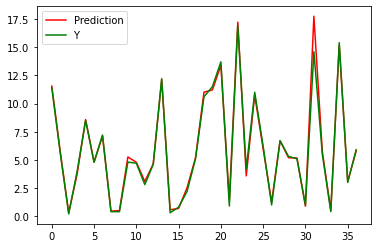

In [13]:
plt.plot(np.arange(37),testPredict, c="r",label="Prediction")
plt.plot(np.arange(37),y_test, c="g", label="Y")
plt.legend()
plt.show()

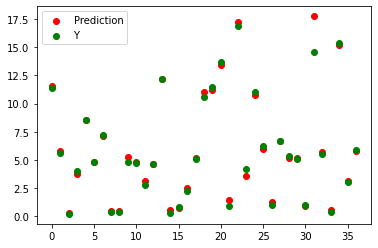

In [14]:
plt.scatter(np.arange(37),testPredict, c="r",label="Prediction")
plt.scatter(np.arange(37),y_test, c="g",label="Y")
plt.legend()
plt.show()

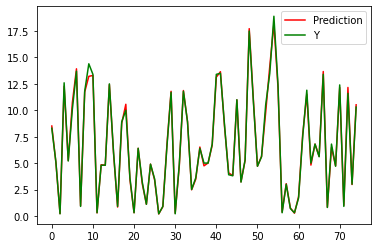

In [15]:
plt.plot(np.arange(trainPredict.shape[0]),trainPredict, c="r", label="Prediction")
plt.plot(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()

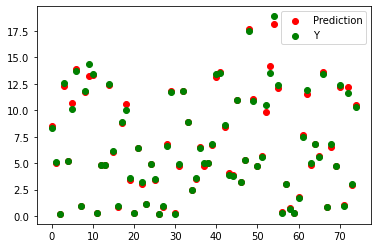

In [16]:
plt.scatter(np.arange(trainPredict.shape[0]),trainPredict, c="r", label="Prediction")
plt.scatter(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()

In [17]:
qq=[y_train,y_test]

In [18]:
df = pd.read_csv('price_informations.csv')

In [19]:
df

,Date,Close,Open,High,Low,Vol,Change %
0,7-Nov-10,0.3,0.4,0.5,0.1,341460.0,-0.29
1,14-Nov-10,0.3,0.3,0.3,0.2,146410.0,0.00
2,21-Nov-10,0.3,0.3,0.3,0.3,73380.0,0.00
3,28-Nov-10,0.2,0.3,0.3,0.2,136930.0,-0.28
4,5-Dec-10,0.2,0.2,0.2,0.2,66890.0,0.00
...,...,...,...,...,...,...,...
160,1-Dec-13,697.0,1205.7,1239.9,576.0,362230.0,-0.42
161,8-Dec-13,908.9,697.0,1067.7,653.0,144170.0,0.30
162,15-Dec-13,640.5,908.9,927.9,454.9,293970.0,-0.30
163,22-Dec-13,762.0,640.5,836.8,615.0,93740.0,0.19


In [20]:
dates = df["Date"]
df.drop("Date",axis= 1, inplace = True)
Y = df["Close"]
X = df.drop(["Close"],axis=1)
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
trainX = np.array(X_train)
testX = np.array(X_test)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
look_back = 5

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, y_train, epochs=200, batch_size=1, verbose=2)

Epoch 1/200
110/110 - 0s - loss: 39539.3633
Epoch 2/200
110/110 - 0s - loss: 39528.6094
Epoch 3/200
110/110 - 0s - loss: 39518.5312
Epoch 4/200
110/110 - 0s - loss: 39508.0625
Epoch 5/200
110/110 - 0s - loss: 39495.2148
Epoch 6/200
110/110 - 0s - loss: 39478.9688
Epoch 7/200
110/110 - 0s - loss: 39458.9883
Epoch 8/200
110/110 - 0s - loss: 39435.6484
Epoch 9/200
110/110 - 0s - loss: 39409.0117
Epoch 10/200
110/110 - 0s - loss: 39379.1289
Epoch 11/200
110/110 - 0s - loss: 39348.9648
Epoch 12/200
110/110 - 0s - loss: 39319.4883
Epoch 13/200
110/110 - 0s - loss: 39289.2734
Epoch 14/200
110/110 - 0s - loss: 39259.9141
Epoch 15/200
110/110 - 0s - loss: 39229.4492
Epoch 16/200
110/110 - 0s - loss: 39199.4102
Epoch 17/200
110/110 - 0s - loss: 39169.3398
Epoch 18/200
110/110 - 0s - loss: 39139.3828
Epoch 19/200
110/110 - 0s - loss: 39109.6992
Epoch 20/200
110/110 - 0s - loss: 39080.3516
Epoch 21/200
110/110 - 0s - loss: 39052.0078
Epoch 22/200
110/110 - 0s - loss: 39023.9648
Epoch 23/200
110/11

Epoch 182/200
110/110 - 0s - loss: 36177.8555
Epoch 183/200
110/110 - 0s - loss: 36160.5156
Epoch 184/200
110/110 - 0s - loss: 36143.2188
Epoch 185/200
110/110 - 0s - loss: 36126.9609
Epoch 186/200
110/110 - 0s - loss: 36110.3320
Epoch 187/200
110/110 - 0s - loss: 36093.2969
Epoch 188/200
110/110 - 0s - loss: 36076.4961
Epoch 189/200
110/110 - 0s - loss: 36059.5781
Epoch 190/200
110/110 - 0s - loss: 36042.8086
Epoch 191/200
110/110 - 0s - loss: 36025.8672
Epoch 192/200
110/110 - 0s - loss: 36008.9219
Epoch 193/200
110/110 - 0s - loss: 35991.7148
Epoch 194/200
110/110 - 0s - loss: 35974.0820
Epoch 195/200
110/110 - 0s - loss: 35956.7383
Epoch 196/200
110/110 - 0s - loss: 35938.5977
Epoch 197/200
110/110 - 0s - loss: 35920.2031
Epoch 198/200
110/110 - 0s - loss: 35902.4688
Epoch 199/200
110/110 - 0s - loss: 35883.3438
Epoch 200/200
110/110 - 0s - loss: 35865.7578


In [21]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 189.35 RMSE
Test Score: 173.21 RMSE


In [22]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 189.35 RMSE
Test Score: 173.21 RMSE


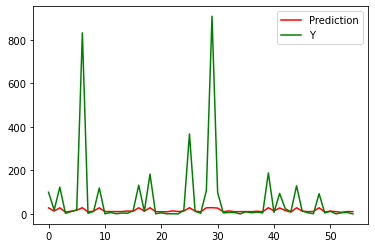

In [23]:
plt.plot(np.arange(testPredict.shape[0]),testPredict, c="r",label="Prediction")
plt.plot(np.arange(testPredict.shape[0]),y_test, c="g", label="Y")
plt.legend()
plt.show()

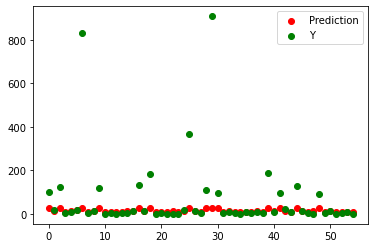

In [24]:
plt.scatter(np.arange(testPredict.shape[0]),testPredict, c="r",label="Prediction")
plt.scatter(np.arange(testPredict.shape[0]),y_test, c="g",label="Y")
plt.legend()
plt.show()

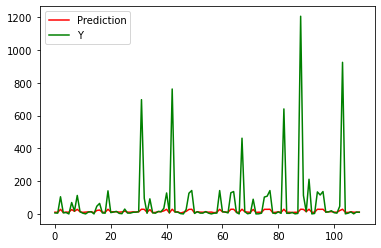

In [25]:
plt.plot(np.arange(trainPredict.shape[0]),trainPredict, c="r", label="Prediction")
plt.plot(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()

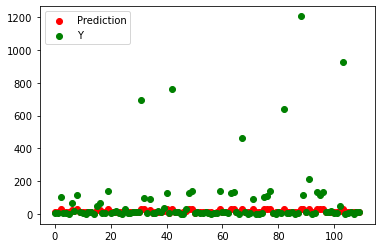

In [26]:
plt.scatter(np.arange(trainPredict.shape[0]),trainPredict, c="r", label="Prediction")
plt.scatter(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()

In [29]:
qq[0]

28      8.3
79      5.1
5       0.2
107    12.6
70      5.2
       ... 
106    12.4
14      0.9
92     11.6
51      3.0
102    10.3
Name: Close, Length: 75, dtype: float64

In [30]:
y_train

27       6.1
76       5.0
142    104.9
38       6.6
41       8.6
       ...  
71       4.7
106     12.4
14       0.9
92      11.6
102     10.3
Name: Close, Length: 110, dtype: float64